In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import os
import keras
import numpy as np
import keras.utils.np_utils as ku
import matplotlib.pyplot as plt
 
import tensorflow as tf
 
from keras.models import load_model

from keras.preprocessing import image
 
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
from keras.models import Sequential
import tensorflow as tf
import cv2
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {
    'buildings': 0,
    'forest': 1,
    'glacier': 2,
    'mountain': 3,
    'sea': 4,
    'street': 5
    }
n_classes = 6

Using TensorFlow backend.


In [4]:
def prepare(filepath):
  size = (150, 150)
  curr_img = cv2.imread(filepath)
  curr_img = cv2.resize(curr_img, size)

  return curr_img.reshape(-1, 150,150,3)

loaded_model = tf.keras.models.load_model('gdrive/My Drive/team Errorist/input/Final.h5')


prediction = loaded_model.predict([prepare('gdrive/My Drive/team Errorist/input/intel-image-classification/seg_pred/seg_pred/5.jpg')])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


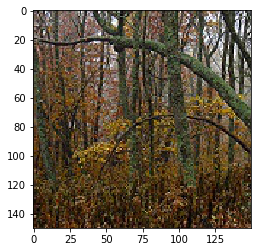

buildings


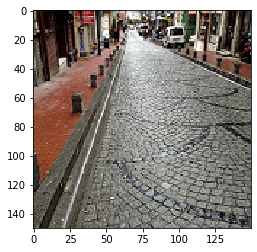

buildings


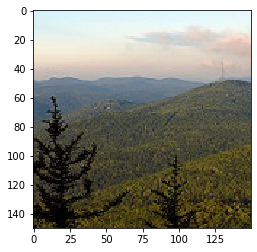

buildings


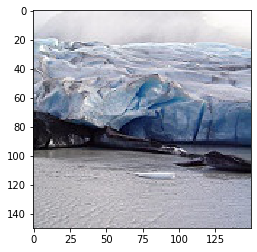

buildings


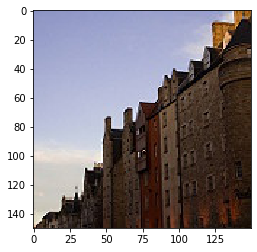

buildings


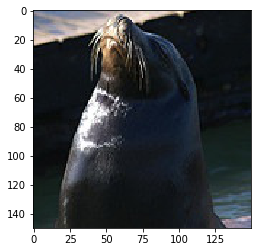

buildings


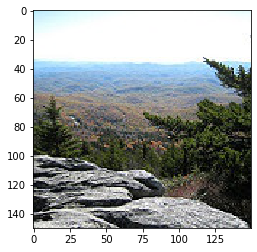

buildings


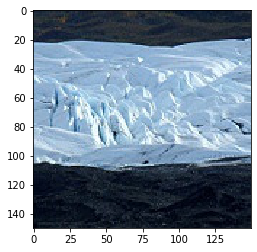

buildings


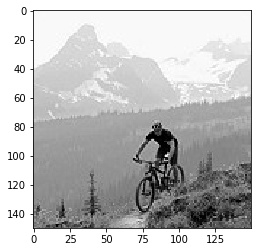

buildings


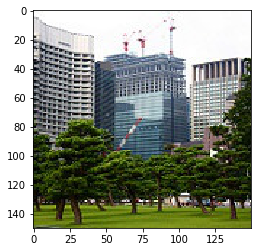

buildings


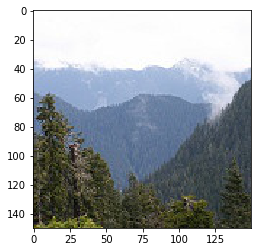

buildings


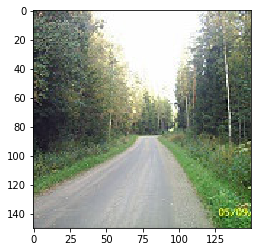

buildings


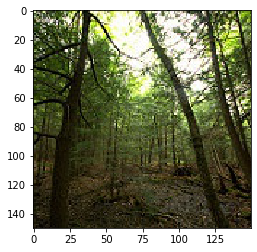

buildings


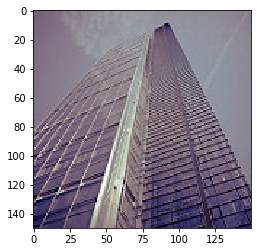

buildings


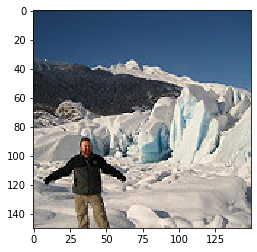

buildings


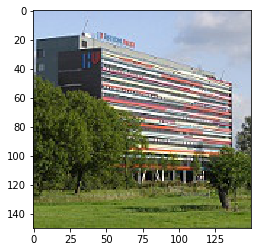

buildings


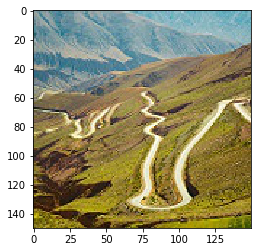

buildings


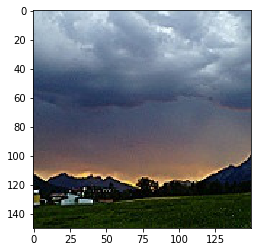

buildings


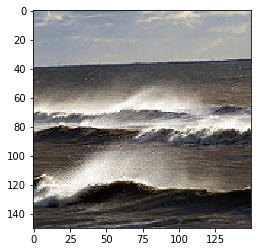

buildings


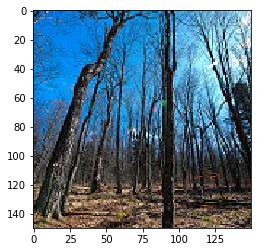

buildings


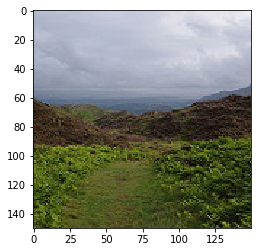

buildings


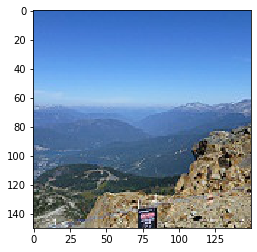

buildings


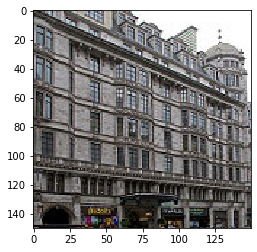

buildings


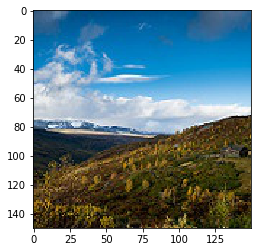

buildings


KeyboardInterrupt: ignored

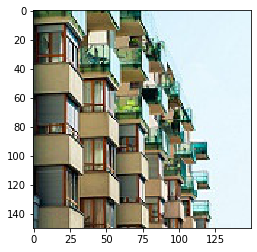

In [10]:
import os
directory = 'gdrive/My Drive/team Errorist/input/intel-image-classification/seg_pred/seg_pred'

for filename in os.listdir(directory):
    image_path=directory + '//' + filename
    img = image.load_img(image_path, target_size=(150,150))
    plt.imshow(img)
    img = np.expand_dims(img, axis=0)
    prediction=loaded_model.predict(img)
    y_classes=tf.keras.utils.to_categorical(prediction, num_classes=None, dtype='float32')
    plt.show()
    ind = np.sum(y_classes)%6
    print(class_names[int(ind)])

In [0]:
from PIL import Image
import numpy as np
import torch
from torch import nn
import pathlib
from torch.utils.data import DataLoader
from torchvision import *

In [0]:
img = Image.open('gdrive/My Drive/team Errorist/input/intel-image-classification/seg_pred/seg_pred/788.jpg')

In [0]:
nimg = np.array(img)

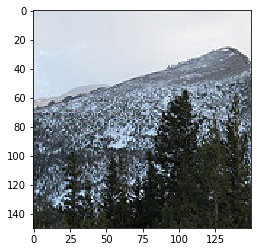

In [43]:
plt.imshow(nimg)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


transformtest = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
])

pimg = transformtest(img).unsqueeze(0).to(device)


In [45]:
pimg.shape


torch.Size([1, 3, 150, 150])

In [46]:
prediction = loaded_model(pimg)


ValueError: ignored

In [0]:
prediction = loaded_model.predict([prepare('gdrive/My Drive/team Errorist/input/intel-image-classification/seg_pred/seg_pred/788.jpg')])
ind = np.argmax(prediction)
print(class_names[ind])


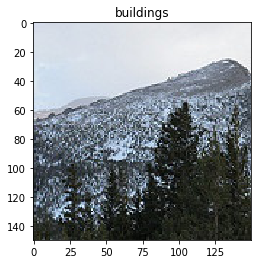

In [47]:
plt.title(class_names[int(prediction[0][0])])
plt.imshow(nimg)